<a href="https://colab.research.google.com/github/JuniorTorresMTJ/Projeto_MoA_no_Paredawn/blob/main/Projeto_Final_MoA_no_Paredawn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
#<font color="#092A32"> ***Projeto Final Imersão Alura 3° edição*** </font>
***

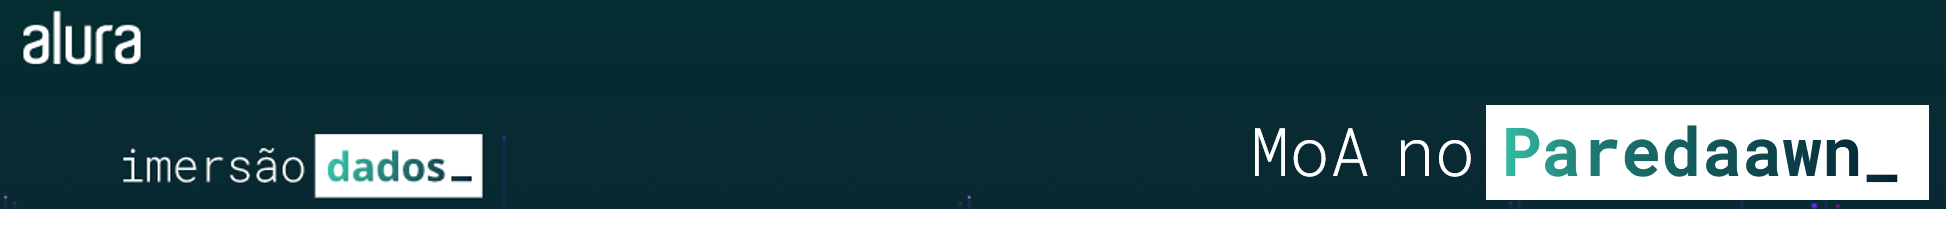

<img src="https://media.giphy.com/media/OWfzhRSn408151pwcU/source.gif" alt="imersão Dados" style="width: 200px;"/>

<p align= "justify">Olá <b>Mergulhadores</b>!!! 

Você deve estar pensando: `O que é esse treco de MoA`, não é mesmo? se não pensou isso, poxa, eu pensei!! 

Mas fique tranquilo, vou tentar descomplicar isso para você! Vamos colocar esse tal de MoA no `paredão` para **analisar e explorar seus dados**, depois vamos tentar criar uma `maquina preditiva` para **prever** com os dados que temos se ele será **atividado** ou **não**. 

Após isso, vamos criar outra maquina preditiva para prever se o experimento feito será com uso de droga ou uso do controle com um melhor metrica de avalição possível. 

Poxa, só de falar estou animado! Espero que você também esteja assim!

Então vamos lá!

#<font color="#092A32">***Objetivos do Projeto***</font>#

<p align= "justify">O objetivo desse projeto é o desenvolvimento de duas maquinas preditivas, com o intuito de auxilar na descoberta de novos medicamentos através dos MoAs (Mecanismo de Ação).



1.   `Primeiro Objetivo:` Criar uma Maquina preditiva que consiga prever se o experimento irá ativar um ou mais MoA, com um F1-score maior que 80%
2.   `Segundo Objetivo:` Criar uma Maquina preditiva que consiga prever se o experimento foi tratado com **droga** ou **com_controle**



#<font color="#092A32">***Contextualizando***</font>#

O [Conective Map](https://clue.io/), é um projeto dentro do MIT e Harvord, o Laboratorio de Ciencia Inovadora aprensenta esse desafio com o objetivo no avanço no desenvolvimento de medicamentos por de algoritmos que consigam prever o MoA.

<font color="#245c68"> Mas o que é MoA?</font>

<p>Do inglês MoA significa Mechanisms of Action (Mecanimos de Ação).</p>

<p align= "justify">Antigamente, as drogas eram derivadas de produtos naturais, muitos remedios eram colocamos em uso clinico sem ao menos entender os mecanimos biológicos daquele medicamento.</p> 

<p align= "justify">Atualmente, com grandes tecnologias, esse processo de descobrimento de novas drogas passou por uma mudança nas abordagens. Hoje, temos um modelo mais voltado para a compreenção do  mecanismo biológico de uma doença, com isso, buscamos identificar um alvo proteíco  associado a uma doença e desenvolver uma molecula que possa reagir com essa proteína alvo.</p>


<font color="#245c68"> Como determinamos os MoAs de um novo medicamento?</font>

<p align= "justify">Uma abordagem é tratar uma amostra de célula humanas com a droga e depois analisar as respostas celulares com algoritmos que consigam identificar padrões conhecidos em grandes bancos de dados genômicos</p>

<p align= "justify">Neste projeto tem um conjunto de dados exclusivo que combina a expressão gênica e os dados de viabilidade celular. Os dados são baseados em uma nova tecnologia que mede simultaneamente (nas mesmas amostras) as respostas das células humanas aos medicamentos em um pool de 100 tipos de células diferentes</p>

<p align= "justify">Em outro conjunto de dados, chamado <b>dados_resuldados.csv</b>, tem as anotações do MoA para mais de 5.000 medicamentos</p>

Esse projeto foi desenvolvido na [Imersão dados - 3° edição - Alura](https://www.alura.com.br/imersao-dados)<br>

Dados estão disponíveis  no [Kaggle](https://www.kaggle.com/c/lish-moa/data) <br>

##Conjunto de Dados


Neste projeto tem dois conjunto de dados sendo eles: 

1.   ```dados_treinamentos.csv ``` 
2.   ``` dados_resultados.csv```


No conjunto de dados ```dados_treinamentos.csv ``` encontramos as seguintes colunas:

Colunas  | Type | Objetivo
-------------------|------------------|------------------
id      | Object | identificador único do experimento
tratamento     | Object | Qual tipo de tratamento, com droga ou com controle
tempo     | int64 | tempo observado 
dose     | Object      | Qual dose tomou 
droga     | Object | Codigo da droga
g-0 até g-771     | float64 | Genes
c-0 até c-99     | float64 | Celulas

#<font color="#092A32">***Importação das Bibliotecas***</font>

In [ ]:
import pandas               as pd
import numpy                as np

#Bibliotecas de visualização de dados
import seaborn              as sns
import matplotlib
import matplotlib.pyplot    as plt

import warnings
warnings.filterwarnings('ignore')

#Bibliotecas de Pré-processamento

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel

#Bibliotecas de Modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier


#Bibliotecas de Avaliação do Modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#<font color="#092A32">***Carregamento das Bases***</font>

##<font color="#245c68"> Carregando a Base Experimentos</font>

In [ ]:
df_experimentos = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')

##<font color="#245c68">Carregando a Base Resultados</font>

In [ ]:
df_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

#<font color="#092A32">***Analise Exploratória***</font>

Então vamos começar a nossa análise e colocar os dados das bases `Experimentos` e `Resultados` no `Paredawn`

<img src="https://media1.tenor.com/images/70afa534ef1f780fadf92fa3ed56a805/tenor.gif?itemid=20867335" alt="Paredawn" width="300"/>





##<font color="#245c68">Base Experimentos</font>

Para iniciar a nossa análise exploratória vamos começar entendendo a dimensão na nossa base utilizando o `.shape`:

In [ ]:
df_experimentos.shape

(23814, 877)

Conforme observado acima, conseguimos perceber que temos `23.814 linhas` e `877 colunas` 

Para verificar as primeiras linhas do nosso DataFrame utilizaremos `.head()`

In [ ]:
df_experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


<p align= "justify">Para conseguir explorar essa base, precisamos saber quais são as colunas, os tipos de dados que possuem nas colunas, se tem valores nulos ou faltantes e algumas estatísticas

In [ ]:
df_experimentos.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [ ]:
#Verificando o tipo das colunas principais
df_experimentos[['id', 'tratamento', 'tempo', 'dose', 'droga','g-0', 'c-0']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          23814 non-null  object 
 1   tratamento  23814 non-null  object 
 2   tempo       23814 non-null  int64  
 3   dose        23814 non-null  object 
 4   droga       23814 non-null  object 
 5   g-0         23814 non-null  float64
 6   c-0         23814 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
#Verificando a contagem, média, desvio padrão, valor minimo, percentis(25%, 50%, 75%) e valor máximo.
df_experimentos.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

<p align= "justify">Vamos verificar se a base possui algum valor nulo. Para isso vamos utilizar o `.isnull()` depois somar todos os nulos com a `sum()` e ordenalos de forma decrescente para ver os maiores primeiro com `sort_values()`.

In [ ]:
df_experimentos.isnull().sum().sort_values(ascending = False)

c-99     0
g-282    0
g-293    0
g-292    0
g-291    0
        ..
g-575    0
g-574    0
g-573    0
g-572    0
id       0
Length: 877, dtype: int64

Vamos que não possui nenhum valor nulo na base `Experimentos`

In [ ]:
#verificando os possíveis valores e a quantidade da coluna tratamento
df_experimentos['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Vamos fazer o nosso primeiro Gráfico, vamos verificar a  coluna `'Tratamento'`, será que essa coluna está balanceada?

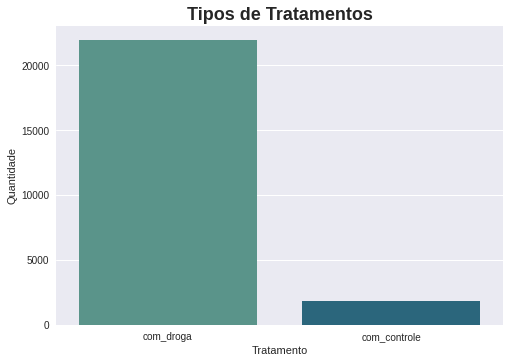

In [ ]:
sns.countplot(x='tratamento', data = df_experimentos, palette="crest")
plt.title('Tipos de Tratamentos', fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Tratamento') 
plt.ylabel('Quantidade') 
plt.show()

Conforme o gráfico vimos que essa coluna está desbalanceada, será que isso afetará na nossa maquina preditiva?

vamos ver a porcentagem de cada variável dessa coluna, para isso utilizaremos o `value_counts` com o parametro  `Normalize`

In [ ]:
print(df_experimentos['tratamento'].value_counts(normalize = True)*100)

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64


Temos uma frequencia total de **92%** de `com_droga` e **7%** de `com_controle`.

Agora vamos ver os gráficos das colunas: Dose e Tempo


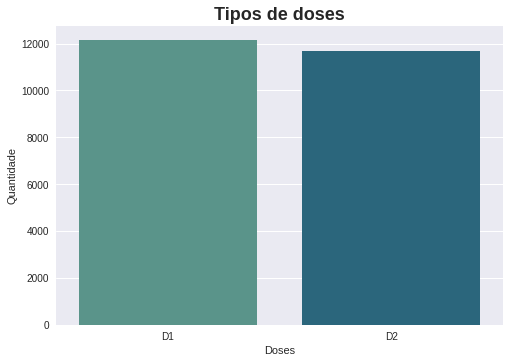

In [ ]:
sns.countplot(x = 'dose', data=df_experimentos, palette="crest")
plt.title('Tipos de doses',fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Doses') 
plt.ylabel('Quantidade') 
plt.show()

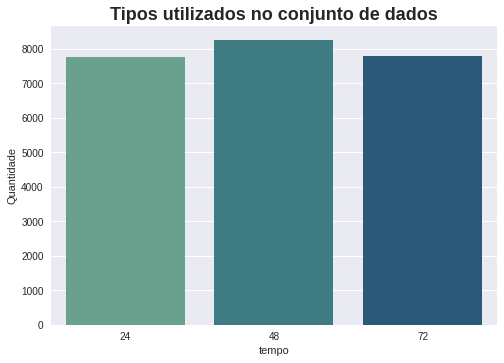

In [ ]:
sns.countplot(x='tempo', data = df_experimentos, palette="crest")
plt.title('Tipos utilizados no conjunto de dados', fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('tempo') 
plt.ylabel('Quantidade') 
plt.show()

Vimos que diferente da coluna `Tratamento`, as colunas `Dose` e `Tempo` estão mais balanceados.


Vamos ver o top 5 drogas mais utilizadas nesse dataset

In [ ]:
ranking_drogas = df_experimentos['droga'].value_counts().index[0:5]
ranking_drogas

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

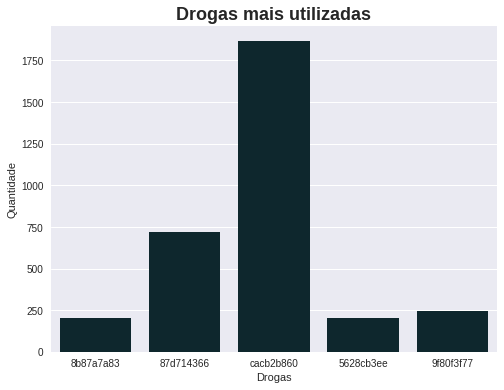

In [ ]:
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'droga', data=df_experimentos.query('droga in @ranking_drogas'),  color='#092A32')
ax.set_title('Drogas mais utilizadas',fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.xlabel('Drogas') 
plt.ylabel('Quantidade') 
plt.show()

Visando deixar mais fácil, vou remover dos nomes das colunas o `-`, por exemplo: 'g-0', após a mudança ficará 'g0'

In [ ]:
df_experimentos.columns = df_experimentos.columns.str.replace("-", "",)

###<font color="#245c68">Correlação</font>

<p align = "justify">"O coeficiente de correlação de Pearson (r) varia entre -1 e +1, cujos valores próximos de -1 e +1 indicam forte correlação linear e próximos de 0 indicam ausência de correlação linear. Note que ele capta apenas relações lineares entre variáveis (quaisquer outras relações, tal coeficiente não é indicado: isso será exemplificado na sequência).

Note que entre 0 e 1, existe uma grande gama de valores que o coeficiente pode assumir. Para tal, diferentes autores buscaram dar “nomes” aos diferentes valores que o coeficiente de correlação pode assumir, para poder dizer se um dado valor de correlação pode ser dito como fraco/moderada/forte."

Fonte: https://gpestatistica.netlify.app/blog/correlacao/

<img src="https://d33wubrfki0l68.cloudfront.net/e3b158e0207e1a80248bc0d7283f6eee638d5e72/4f6f0/blog/correlacao_files/figure-html/unnamed-chunk-4-1.png" alt="Correlação de Pearson" width="400" />

Vamos verificar qual a correlação entre as colunas dos genes: `g50` até `g100`e viabilidade celular: `c50` até `c99` tem entre elas:

In [ ]:
corr_g = df_experimentos.loc[:,'g50':'g100'].corr()

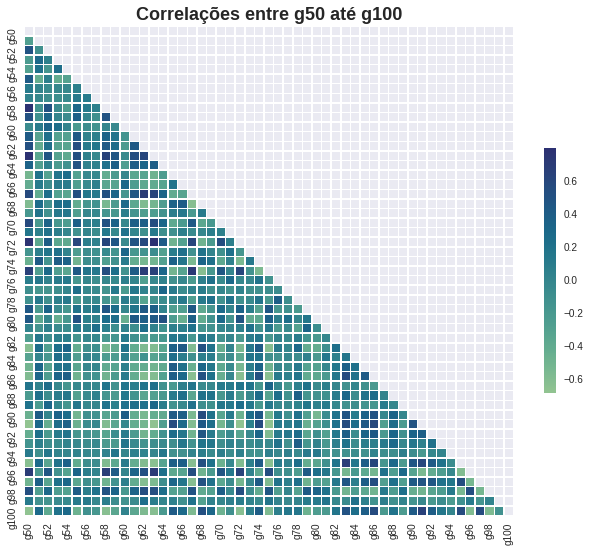

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_g, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("crest", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlações entre g50 até g100',fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.show()

In [ ]:
corr_c = df_experimentos.loc[:,'c49':'c99'].corr()

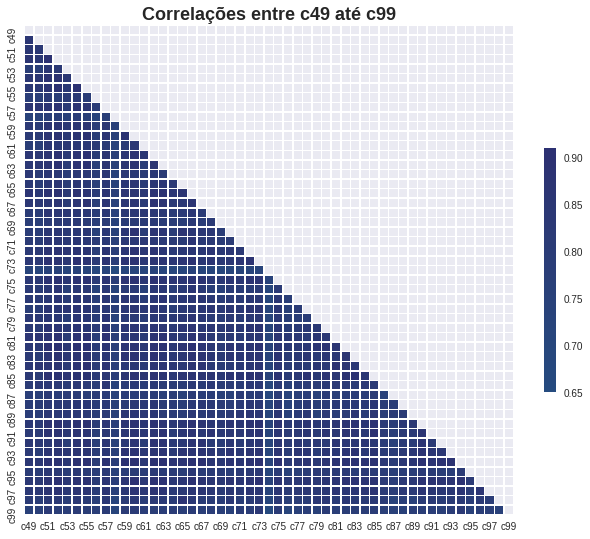

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_c, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("crest", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlações entre c49 até c99',fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.show()

##<font color="#245c68">Base Resultados</font>

Como já colocamos no `paredão` a ***base de experimento*** e exploramos, vamos colocar no `paredão` a ***base de resultados*** para explorar.

Como fizemos na exploração anterior vamos ver se essa base tem a mesma **dimensão** que a base de experimento, para isso vamos utilizar o `.shape`

In [ ]:
df_resultados.shape

(23814, 207)

Diferente da base de dados anterior, essa base tem menos colunas, um total de `207 colunas`. Vamos verificar as primeira linhas.

In [ ]:
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Vamos olhar os nomes das colunas e ver se conseguimos tirar alguma informação

In [ ]:
df_resultados.columns

Index(['id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

In [ ]:
#Verificar os tipos de dados das colunas do dataset
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


No .head() vimos que aparecem muitos 0 e 1, pois 0 significa que não houve um ativamento do mecanismo de Ação, já o 1 é o ativimente do MoA. Vale ressaltar, que o mesmo experimento pode ativar  nenhum, um ou vários MoAs.

In [ ]:
#Verificando a contagem, média, desvio padrão, valor minimo, percentis(25%, 50%, 75%) e valor máximo.
df_resultados.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.00000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,0.015117,0.002771,0.000294,0.001764,0.000504,0.000504,0.002016,0.003737,0.003359,0.001512,0.001554,0.003065,0.000252,0.001806,0.000504,0.000546,0.000504,0.000756,0.003065,0.001512,0.000966,0.002058,0.001974,0.000252,0.000042,0.000504,0.004073,0.000798,0.004031,0.000252,...,0.004325,0.000798,0.002352,0.009364,0.000504,0.002813,0.000252,0.00147,0.001554,0.001050,0.009910,0.016965,0.001848,0.001512,0.001512,0.001050,0.011212,0.001050,0.002981,0.000252,0.000798,0.002520,0.001260,0.000798,0.001554,0.001260,0.000294,0.001512,0.005333,0.000756,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,0.122022,0.052573,0.017143,0.041960,0.022443,0.022443,0.044851,0.061020,0.057864,0.038852,0.039387,0.055283,0.015871,0.042456,0.022443,0.023359,0.022443,0.027483,0.055283,0.038852,0.031063,0.045315,0.044383,0.015871,0.006480,0.022443,0.063693,0.028236,0.063365,0.015871,...,0.065625,0.028236,0.048437,0.096317,0.022

Note que o `Max` é sempre `1` e o` Min` é sempre `0`, pois nessa base está populada com ***0 e 1***

In [ ]:
#Verificando se tem valores nulos
df_resultados.isnull().sum().sort_values(ascending = False)

wnt_inhibitor                           0
cdk_inhibitor                           0
dihydrofolate_reductase_inhibitor       0
cytochrome_p450_inhibitor               0
cyclooxygenase_inhibitor                0
                                       ..
mtor_inhibitor                          0
monopolar_spindle_1_kinase_inhibitor    0
monoamine_oxidase_inhibitor             0
monoacylglycerol_lipase_inhibitor       0
id                                      0
Length: 207, dtype: int64

Vamos verificar se o `max` é `1` e o `min` é `0` escolhendo o primeiro MoA e olha seus possiveis valores utilizando o `.unique()`

In [ ]:
df_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

Vamos verificar qual foi o MoA que mais ativou, para isso vamos somar todas as ativações e ordenar em ordem decrescente

In [ ]:
df_resultados.drop('id', axis=1).sum().sort_values(ascending=False)


nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Os dois que mais ativaram são os que tem `inhibitor` no nome

Agora vamos criar um `DataFrame` para armazenar os MoA e a quantidade de cada ação

In [ ]:
moas = df_resultados.drop(['id'], axis = 1).sum().sort_values(ascending = False).reset_index()
moas.columns = ['moa', 'quantidade']
moas

,moa,quantidade
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404
...,...,...
201,protein_phosphatase_inhibitor,6
202,autotaxin_inhibitor,6
203,diuretic,6
204,erbb2_inhibitor,1


Agora vamos separar o primeiro nome do segundo para saber qual ação mais é ativada

In [ ]:
rename = moas['moa'].str.split('_')
list_rename=[]
for i in rename:
  list_rename.append(i[-1])

list_rename[:10]

['inhibitor',
 'inhibitor',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'inhibitor']

Vamos armazenar esse resultado em uma nova coluna nesse novo DataFrame que foi criado chamado moas.

In [ ]:
moas['action'] = list_rename

moas.head()

,moa,quantidade,action
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist


Agora vamos agrupar pela coluna `Action` e somar todos que tem o mesma ação e visualizar as 5 ações que mais ativaram

In [ ]:
rank_moa = moas.groupby(by=['action']).agg({'quantidade': 'sum'}).sort_values('quantidade', ascending=False)[:5]
rank_moa

,quantidade
action,
inhibitor,9693
antagonist,3449
agonist,2330
blocker,323
agent,150


<Figure size 1080x864 with 0 Axes>

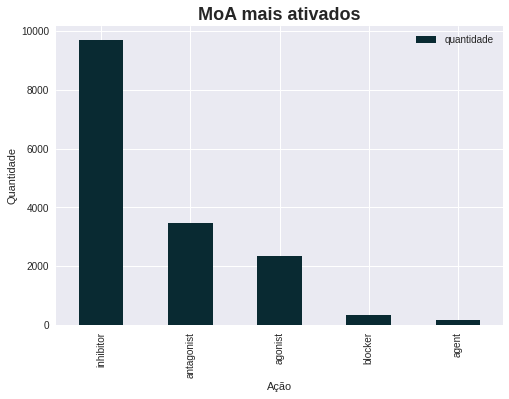

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,12))
rank_moa.plot.bar(color='#092A32')
plt.title('MoA mais ativados',fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Ação') 
plt.ylabel('Quantidade') 
plt.show()

#<font color="#092A32">***Pré-processamento dos Dados***</font>

Agora que já colocamos as duas bases no `paredawn`, vamos preparar nossos dados para a criação da máquina preditiva

##<font color="#245c68">Transformação das colunas</font>

Vamos transformar as colunas que possuem o tipo de dados string em `1-0`

Para a Base Experimentos vamos transformar as colunas: `tempo`, `tratamento`, `dose` e criar as colunas para armazenar essas transformaçoes em `tempo_24` , `tempo_48`, `tempo_72`, `dose`.

###Base Experimentos

Vamos separar a coluna tempo em 3 `tempo_24`, `tempo_48`, `tempo_72`, cada coluna será uma coluna binária (`0-1`).

Caso seja o tempo que esteja no nome da coluna, será identificado como `1`, caso não é `0`

In [ ]:
tempo24 = df_experimentos['tempo'] == 24
tempo24

0         True
1        False
2        False
3        False
4        False
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: tempo, Length: 23814, dtype: bool

In [ ]:
tempo48 = df_experimentos['tempo'] == 48
tempo48

0        False
1        False
2         True
3         True
4        False
         ...  
23809    False
23810    False
23811     True
23812    False
23813    False
Name: tempo, Length: 23814, dtype: bool

In [ ]:
tempo72 = df_experimentos['tempo'] == 72

In [ ]:
com_droga  = df_experimentos['tratamento'] =='com_droga'

In [ ]:
D1 = df_experimentos['dose'] == 'D1'

In [ ]:
df_experimentos['tempo_24'] = tempo24.astype('int')
df_experimentos['tempo_48'] = tempo48.astype('int')
df_experimentos['tempo_72'] = tempo72.astype('int')
df_experimentos['com_droga'] = com_droga.astype('int')
df_experimentos['dose'] = D1.astype('int')

In [ ]:
df_experimentos.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tempo_24,tempo_48,tempo_72,com_droga
0,id_000644bb2,com_droga,24,1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,0,0,1
1,id_000779bfc,com_droga,72,1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,1
2,id_000a6266a,com_droga,48,1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,1,0,1
3,id_0015fd391,com_droga,48,1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,1,0,1
4,id_001626bd3,com_droga,72,0,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,1


In [ ]:
#df_experimentos.drop(['tratamento', 'tempo', 'dose'], axis=1, inplace=True)

In [ ]:
df_experimentos.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tempo_24,tempo_48,tempo_72,com_droga
0,id_000644bb2,com_droga,24,1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,0,0,1
1,id_000779bfc,com_droga,72,1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,1
2,id_000a6266a,com_droga,48,1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,1,0,1
3,id_0015fd391,com_droga,48,1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,1,0,1
4,id_001626bd3,com_droga,72,0,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,1


###Base Resultados

Na Base de Resultados vamos adicionar duas colunas, uma coluna será a soma de todos MoAs que ativaram.

A outra coluna que contenha um True `1` ou False `0`, se foi ativado pelo menos uma vez ira ser 1, caso não tenha ativado nenhum, irá ser `0` . Assim, definiremos a nossa `variável target` para prevermos do `Objetivo 1`. 



In [ ]:
df_resultados['qtd_moa'] = df_resultados.drop('id', axis=1).sum(axis=1)

In [ ]:
#visualizando quantos MoAs foram ativados
df_resultados['qtd_moa'].sort_values(ascending=False)

21197    7
4849     7
19186    7
14316    7
20584    7
        ..
6862     0
6861     0
11997    0
6859     0
23813    0
Name: qtd_moa, Length: 23814, dtype: int64

In [ ]:
#observando a nova coluna criada
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,qtd_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Criando a coluna que irá mostrar se houve pelo menos uma ativivação ou não, caso tenha pelo menos uma ativação será True, caso não False.

In [ ]:
df_resultados['qtd_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: qtd_moa, Length: 23814, dtype: bool

Vamos criar uma nova coluna na base de dados `resultados`

In [ ]:
df_resultados['tem_moa'] = df_resultados['qtd_moa'] != 0

In [ ]:
#Verificando a nova coluna chamada 'tem_moa'
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,qtd_moa,tem_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


Mas pensando na nossa Maquina Preditiva, não é benéfico deixar em `True` e `False`, vamos transformar em `0` para False e `1` Para True. 

Para isso, vamos utilizar a Biblioteca  `sklearn.preprocessing` e importar o `LabelEncoder` para fazer essa transformação

In [ ]:
#Aplicando a transformação
labelEncoder = LabelEncoder()
tem_moa = labelEncoder.fit_transform(df_resultados.tem_moa)

df_resultados['atv_moa'] = tem_moa
#Visualizando a transformação
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,qtd_moa,tem_moa,atv_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,1


Vamos remover a coluna `tem_moa`, pois já temos a informação que queremos na coluna nova chamada `atv_moa` ( que mostra se foi ativado pelo menos uma vez ou não).

In [ ]:
df_resultados.drop('tem_moa', inplace=True, axis=1)

In [ ]:
#verificando o DataFrame sem a antiga coluna
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,qtd_moa,atv_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


##<font color="#245c68">Junção das Bases</font>

Já transformamos todas as colunas que queríamos, agora vamos juntar as duas bases para conseguirmos ter uma melhor análise e cruzar melhor as colunas para tirar insights

In [ ]:
df = pd.merge(df_experimentos, df_resultados[['id','qtd_moa', 'atv_moa',]], on='id')
df.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tempo_24,tempo_48,tempo_72,com_droga,qtd_moa,atv_moa
0,id_000644bb2,com_droga,24,1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,0,0,1,1,1
1,id_000779bfc,com_droga,72,1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,1,0,0
2,id_000a6266a,com_droga,48,1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,1,0,1,3,1
3,id_0015fd391,com_droga,48,1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,1,0,1,0,0
4,id_001626bd3,com_droga,72,0,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,1,1,1


#<font color="#092A32">***Levantamento de Hipóteses***</font>

Após conhecer a nossa base e fazer as transformações necessárias, vamos levantar algumas hipóteses para tentar válidar elas ou não.

1.   Todos os experimentos que foram tratados com com_controle não houve ativação do MoA
2.   Dos experimentos que foram tratados com droga, 20% não ativaram o MoA
3.   Metade dos experimentos que receberam a primeira dose não ativaram o MoA
4.   90% dos experimentos tratados com droga que receberam a segunda dose ativaram o MoA
5.   A droga mais utilizada nos experimentos ativa o MoA 4 vezes, pelo menos uma vez
6.   A droga mais utilizada nos experimentos não precisa tomar a segunda dose
7.   Os experimentos que tiveram 24 horas de espera só ativaram o MoA 50% dos casos.
8.   Os experimentos que foram tratados com droga, 75% ativa com a espera de 72 horas.




Agora que criamos nossas hipoteses, vamos verificar elas.

##1. Todos os experimentos que foram tratados com com_controle não houve ativação do MoA

Vamos verificar todos que que não foram utilizados droga e ver se tiveram MoA. Em tese, `com_controle` não deveria ter ativado o MoA

In [ ]:
df.query('com_droga == 0')['atv_moa'].value_counts()

0    1866
Name: atv_moa, dtype: int64

Conforme previsto, realmente nenhum com controle ativou um MoA



##2. Dos experimentos que foram tratados com droga, 20% não ativaram o MoA

Vamos ver se os tratados com droga não ativaram o MoA

In [ ]:
df.query('com_droga == 1')['atv_moa'].value_counts(normalize=True)

1    0.658238
0    0.341762
Name: atv_moa, dtype: float64

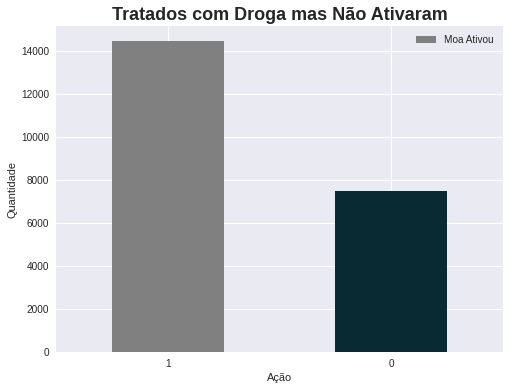

In [ ]:
droga_atv = df.query('com_droga == 1')['atv_moa'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(8,6))
ax = droga_atv.plot.bar(color=['grey','#092A32'])
plt.title('Tratados com Droga mas Não Ativaram',fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Ação') 
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(['Moa Ativou'])
plt.show()

34% dos que receberam o tratamento com droga não ativaram o MoA

##3. Metade dos experimentos que receberam a primeira dose não ativaram o MoA

In [ ]:
df.query('com_droga == 1 and dose == 1')['atv_moa'].value_counts(normalize=True)

1    0.658449
0    0.341551
Name: atv_moa, dtype: float64

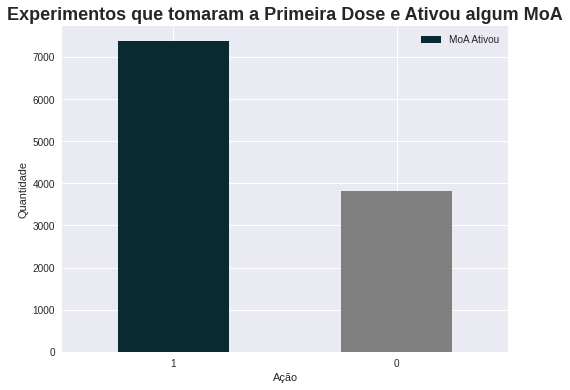

In [ ]:
droga_d1 = df.query('com_droga == 1 and dose == 1')['atv_moa'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(8,6))
droga_d1.plot.bar(color=['#092A32','grey',])
plt.title('Experimentos que tomaram a Primeira Dose e Ativou algum MoA',fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Ação') 
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(['MoA Ativou'])
plt.show()

Neste caso, apenas 34% dos experimentos receberam a primeira dose, não ativou o MoA

##4. 90% dos experimentos que foram tratados com droga que receberam a segunda dose ativaram o MoA

In [ ]:
df.query('com_droga == 1 and dose == 0')['atv_moa'].value_counts(normalize=True)

1    0.658017
0    0.341983
Name: atv_moa, dtype: float64

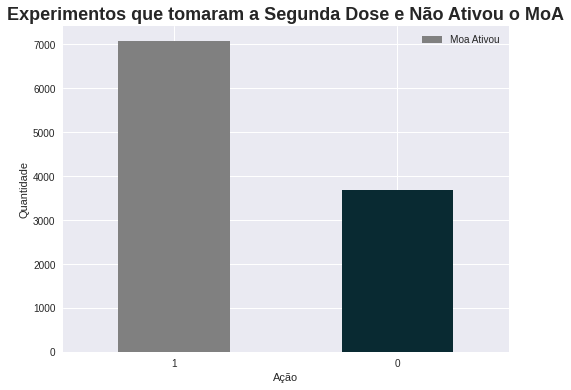

In [ ]:
droga_d2 = df.query('com_droga == 1 and dose == 0')['atv_moa'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(8,6))
droga_d2.plot.bar(color=['grey','#092A32'])
plt.title('Experimentos que tomaram a Segunda Dose e Não Ativou o MoA',fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Ação') 
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(['Moa Ativou'])
plt.show()

Apenas 65% dos experimentos que foram tratados com droga que receberam a segunda dose ativaram o MoA

##5. A droga mais utilizada nos experimentos ativa o MoA 4 vezes pelo menos uma vez

In [ ]:
df.groupby(by='droga')['qtd_moa'].sum().sort_values(ascending = False)

droga
87d714366    1436
d50f18348     558
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
8be20f208       0
8c25111b8       0
8c48a42be       0
8c7b401c2       0
00199ff52       0
Name: qtd_moa, Length: 3289, dtype: int64

In [ ]:
df.query('droga == "87d714366"')['qtd_moa'].sort_values(ascending = False)

23802    2
7647     2
8425     2
8404     2
8359     2
        ..
16260    2
16258    2
16246    2
16235    2
16       2
Name: qtd_moa, Length: 718, dtype: int64

A droga mais utilizada nos experimentos ativa o 2 MoAs **todas** das vezes.

##6. A droga mais utilizada nos experimentos não precisa tomar a segunda dose

In [ ]:
df.query('droga == "87d714366"')['dose'].value_counts()

1    375
0    343
Name: dose, dtype: int64

A droga mais utilizada tem casos que não ativou o MoA.

##7. Os experimentos que tiveram 24 horas de espera só ativaram o MoA 50% dos casos.

In [ ]:
df.query('tempo_24 == 1')['atv_moa'].value_counts()

1    4718
0    3054
Name: atv_moa, dtype: int64

##8. Os experimentos que foram tratados com droga, 75% ativa com a espera de 72 horas.

In [ ]:
df.query('tempo_72 == 1 and com_droga == 1')['atv_moa'].value_counts(normalize=True)

1    0.659053
0    0.340947
Name: atv_moa, dtype: float64

Apenas 65% ativa o MoA em 72 horas

#<font color="#092A32">***Criação da Maquina Preditiva***</font><b>
Objetivo 1: Prever quando ativa pelo menos 1 MoA

Então agora vamos criar maquina preditiva do primeiro objetivo.

Vamos escolher uma semente para que sempre quando tiver parametros de aleatoridade usaremos essa semente.

Vamos fazer a nossa seleção das variáveis target e variáveis preditoras. 

 

1.   `Variável target:` variavel que queremos prever.
2.   `Variável preditora:` variável que irá nos auxilar na predição.




Vamos dividir nosso conjunto de dados em conjunto de treino e conjunto de teste. 

geralmente o conjunto de teste tem de tamanho em torno de 20% a 50%  de todo o conjunto de dados. Isso depende muito do tamanho do conjunto de dados. 

Neste projeto escolhi deixar o com 30% para testar o nosso modelo.

In [ ]:
SEED = 10

x = df.select_dtypes('float64','int64')
y = df['atv_moa']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)

Vamos testar em vários modelos preditivos de `Classificação`, com o objetivo de selecionar o melhor modelo possível para nossos dados.

##Modelo Regressão Logistica antes do Balanceamento

O primeiro será o modelo de regressão Logistica, para isso precisamos importar a biblioteca `sklearn.linear_model`  e escolher o modelo de `LogisticRegression`.
Para ver a documentação da Biblioteca [clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
Vamos instanciar o modelo e treinar com nossos dados de treino.

In [ ]:
model_rl = LogisticRegression(max_iter=1000)
model_rl.fit(x_train, y_train)
y_predict=model_rl.predict(x_test)

###Avaliando o Modelo

Agora que já treinamos nossos dados, vamos avaliar o modelo, existem diversas métricas de avaliação. Neste projeto utilizaremos: `precision` , `recall`, ` F1-score`  e `Accuracy`

In [ ]:
model_rl.score(x_test, y_test)*100


62.43526941917425

Tivemos um score de 62% e infelizmente isso é muito baixo.

<img src="https://media1.tenor.com/images/9a883dd19f6ac5c7cb1ae882d458afcd/tenor.gif?itemid=21270823" alt="imersão Dados" width="200"/>


Mas calma, ainda temos muito trabalho pela frente, a vida de um Cientista é assim mesmo, precisamos testar, testar e no fim testar!

Vamos criar uma matrix para entender como está o erro, a coluna `Real` é a coluna dos **dados certos**, ja a coluna `Predictions `é a coluna que a **máquina previu**.

In [ ]:
mtx = pd.DataFrame({'Real':y_test,'Predictions': y_predict})
mtx

,Real,Predictions
8579,1,0
16718,0,0
17007,1,1
1901,1,1
13470,1,1
...,...,...
619,0,1
12019,1,0
16869,1,1
7536,1,0


Vamos importar a biblioteca que mostra várias métricas de Classificação. Para isso utilizamos a biblioteca `sklearn.metrics` e importamos o `classification_report`

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.54      0.40      0.46      2841
           1       0.66      0.77      0.71      4304

    accuracy                           0.62      7145
   macro avg       0.60      0.59      0.59      7145
weighted avg       0.61      0.62      0.61      7145



Assim ele mostra todas as métricas importantes para avaliar o modelo. 



62% significa que a cada 100 previsões ele irá acertar apenas 62  e errar 38 de todas as 100, sendo muito baixo.

Esse modelo não está muito bom, vamos ver outro modelo e eu escolho o XGB.

##Modelo XGBoost antes do Balanceamento

Agora vamos utilizar o XGB, para isso precisamos importar a biblioteca `xgboost`  e escolher o modelo de `XGBClassifier`.




Para ver a documentação [Clique Aqui](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

Vamos instanciar o modelo e treinar com os dados

In [ ]:
model_x=XGBClassifier()
model_x.fit(x_train,y_train)
y_predict=model_x.predict(x_test)

###Avaliando o Modelo

Agora que treinamos vamos **avaliar** como fizemos com o modelo anterior e irei fazer a `avaliação` nos `demais modelos`, para poder `comparar` depois.

In [ ]:
model_x.score(x_test, y_test)*100

65.47235829251224

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.67      0.26      0.38      2841
           1       0.65      0.91      0.76      4304

    accuracy                           0.65      7145
   macro avg       0.66      0.59      0.57      7145
weighted avg       0.66      0.65      0.61      7145



Esse modelo está com um Score de 65%, aumentou 3% referente ao anterior, melhor que o Regressão Logistica, mas ainda não é o suficiente. 

Então vamos tentar mais um modelo, caso não seja bom, vamos tentar descobrir como podemos melhorar.

##Modelo RandomForest antes do Balanceamento

Agora usaremos o Random Forest, para utilizar ele precisamos importar a biblioteca `sklearn.ensemble`  e escolher o modelo de `RandomForestClassifier`.

Para acessar a documentação [clique Aqui](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
#instaciando o modelo e treinando
model_rf = RandomForestClassifier(n_estimators=100,random_state=SEED, n_jobs=-1)
model_rf.fit(x_train, y_train)
y_predict = model_rf.predict(x_test)

###Avaliando o Modelo

In [ ]:
model_rf.score(x_test, y_test)*100

64.35269419174247

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.62      0.26      0.37      2841
           1       0.65      0.90      0.75      4304

    accuracy                           0.64      7145
   macro avg       0.64      0.58      0.56      7145
weighted avg       0.64      0.64      0.60      7145



O Random Forest ainda ficou pior que o XGBoost, com 64%. 

Na nossa `analise de exploratória`, vimos que a coluna que `com_droga` está `muito desbalanceada`, vamos balancear ela e verificar se `melhoramos` o score dos `nossos modelos`

#<font color="#092A32">***Balanceando os Dados***</font>

Desbalanceamento ocorre quando temos um conjunto de dados que possui `muitos exemplos` de uma classe e `poucos exemplos` da outra classe. Como vimos na coluna `com_droga`.

Quando isso ocorre, temos algumas técnicas para aplicar , por exemplo o Upsample e Downsample. 

***Upsample:***

"Upsampling é um técnica de processamento digital de sinais para aumentar artificialmente a taxa de amostragem em N vezes, inserindo um número N-1 de zeros entre as amostras originais do sinal, e passando o conjunto obtido por um filtro de reconstrução, que nada mais é que um filtro do tipo passa-baixas. Para mostrar essa técnica utilizaremos o programa anterior ligeiramente modificado. O script a seguir simula o upsampling da senoide ideal e realiza a filtragem de reconstrução."

***Downsample:***

"Downsampling ou decimação é a técnica de redução da taxa de amostragem. Isso é feito simplesmente separando uma amostra a cada N. Há uma inevitável distorção do sinal."

Fonte: [Clique Aqui](https://www.embarcados.com.br/oversampling-upsampling-downsampling-dsp/#:~:text=A%20sobre%2Damostragem%20(oversampling),artificial%20da%20taxa%20de%20amostragem.)

<img src="https://www.mdpi.com/education/education-09-00275/article_deploy/html/images/education-09-00275-g001-550.jpg" alt="imersão Dados" width="500"/>


Vamos verificar nossa coluna e a frequencia de seus valores

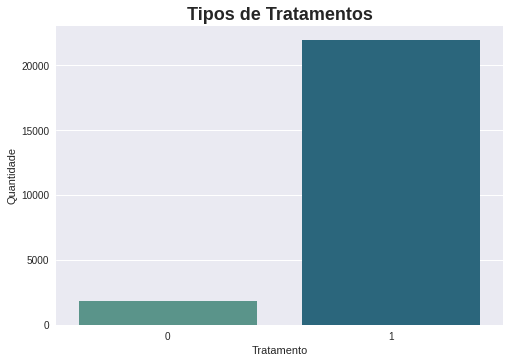

In [ ]:
sns.countplot(x='com_droga', data = df, palette="crest")
plt.title('Tipos de Tratamentos', fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Tratamento') 
plt.ylabel('Quantidade') 
plt.show()

Veja que está muito desbalanceado, isso faz com que a maquina preditiva aprenda muito quando é droga, mas não aprende quando não é droga, assim fazendo ela errar.

Vamos resolver esse problema e vamos testar nossos modelos novamente.

Escolhi a técnica de `Upsampling`, assim vamos aumentar o número de `0 ` que tem nessa coluna:

In [ ]:
#criando variáveis para a coluna
w= df.drop(['com_droga'],axis =1)
z = df['com_droga']

Vamos separar em variáveis qual tem mais e qual tem menos.

In [ ]:
classe_com_mais = df[df.com_droga ==  1]
classe_com_menos  = df[df.com_droga ==  0]

In [ ]:
#Classe antes do Upsampling
classe_com_mais.shape

(21948, 883)

In [ ]:
#Classe antes do Upsampling
classe_com_menos.shape

(1866, 883)

Agora vamos aplicar a técnica UpSampling, vamos importar a biblioteca `sklearn.utils` e escolher o `resample`.

In [ ]:
classe_com_menos_upsample = resample(classe_com_menos, replace = True,
                            n_samples = 21948,
                            random_state = SEED)

Depois de feito a técnica, vamos concatenar os dados com o `.concat`.

In [ ]:
dados = pd.concat([classe_com_mais, classe_com_menos_upsample])

Vamos verificar se foi feita a técnica? vamos utilizar o .`value_counts()`

In [ ]:
dados.com_droga.value_counts()

1    21948
0    21948
Name: com_droga, dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43896 entries, 0 to 8203
Columns: 883 entries, id to atv_moa
dtypes: float64(872), int64(8), object(3)
memory usage: 296.1+ MB


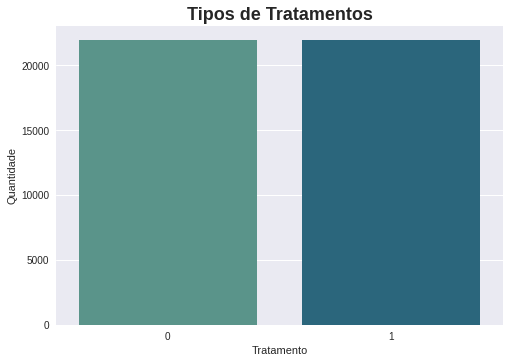

In [ ]:
#Criando o Gráfico
sns.countplot(x='com_droga', data = dados, palette="crest")
plt.title('Tipos de Tratamentos', fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.xlabel('Tratamento') 
plt.ylabel('Quantidade') 
plt.show()

Pronto, agora a nossa coluna está balanceada, será que teremos uma melhora no nosso modelo? Vamos conferir!

#<font color="#092A32">**Criando Maquina Preditiva depois do Balanceamento**

Agora que temos a coluna balanceada, vamos dividir novamente nossos dados em treino e teste usando o `train_test_split` da biblioteca `sktlearn` <br>
Colocamos no  `X` as variáveis preditoras (variável que auxiliam na predição). <br>
Já no `y` sempre colocamos a variável target (variável que queremos prever).

In [ ]:
x = dados.select_dtypes('float64','int64')
y = dados['atv_moa']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)

Agora já separado, vamos aplicar os modelos de `aprendizado de máquina.`

##Modelo Regressão Logistica depois do Balanceamento

Vamos utilizar primeiro o modelo Regressão Logistica 

In [ ]:
model_rl = LogisticRegression(max_iter=1000)
model_rl.fit(x_train, y_train)
y_predict = model_rl.predict(x_test)

###Avaliando o modelo

In [ ]:
model_rl.score(x_test, y_test)*100

78.09248993849192

Uau que incrível! <br>
<img src="https://media1.tenor.com/images/aeb09d020883abe4713264ac4a4ce748/tenor.gif?itemid=16826989" alt="tiago" width="300"/>


Antes sem o balanceamento da coluna `com_droga` o modelo de `Regressão Logística` tinha um score de 62% e só com o balanceamento subiu para 78%, isso é **muito bom**... estamos no **caminho certo**!



In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      8776
           1       0.69      0.62      0.65      4393

    accuracy                           0.78     13169
   macro avg       0.76      0.74      0.75     13169
weighted avg       0.78      0.78      0.78     13169



Agora vamos testar o modelo que se saiu melhor com a coluna desbalanceada o XGBoost

##Modelo XGB depois do Balanceamento

In [ ]:
#Instanciando o modelo e treinando
model_x=XGBClassifier()
model_x.fit(x_train,y_train)
y_predict=model_x.predict(x_test)

###Avaliando o Modelo

In [ ]:
model_x.score(x_test, y_test)*100

77.86468220821627

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      8776
           1       0.68      0.63      0.65      4393

    accuracy                           0.78     13169
   macro avg       0.75      0.74      0.75     13169
weighted avg       0.77      0.78      0.78     13169



Esse também melhorou depois do balanceamento, antes era `65%` e agora está com `77%`, teve uma melhora de 123%, porém o modelo de Regressão Linear está melhor que ele. 

O que mais podemos fazer para melhorar nossas métricas?

Vamos utilizar a técnica de Feature Seletion.

#<font color="#092A32">***Feature Selection (Seleção de Variáveis)***</font>

Há boatos que para criar um modelo de aprendizado de máquina precisa de muita calma, paciencia e  muito teste. Realmente, você precisa saber diversas técnicas, como elaborar, construir e refinar o seu modelo e testar! 

Uma dessas técnicas é a Seleção de Variáveis. Assim como o nome já diz, essa técnica seleciona as melhores variáveis para o modelo, ter variáveis de mais isso pode prejudicar a performance do algoritmo. 

Muitas features podem causar problemas como duração para treinamento do modelo ou dificuldades de colocar modelo de produção. Essa técnica ajuda a reduzir o overfitting e aumenta a accurácia do modelo e como já foi falado reduz o tempo de treino. 

Se quiser saber mais sobre essas técnicas em python [Clique Aqui](https://medium.com/data-hackers/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-faf74e357913)

Para isso vamos utilizar o *SelectFromModel*, importanto a biblioteca `sklearn.feature_selection` e selecionar o `SelectFromModel`

para acessar a documentação [clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)

Vamos utilizar o modelo RandomForest para classificar as melhores variáveis, depois vamos treinar com RandomForest também para verificar as métricas.

Para isso utilizei uma estrutura de repetição chamada For, para verificar em 10 e 10 quais as melhores variáveis.

Deixei o código comentado pois ele demora muito para executar!

In [ ]:

  '''k_vs_score = []
#for k in range(10, x_train.shape[1], 10):
  model_rf = RandomForestClassifier(n_estimators=100,random_state=SEED, n_jobs=-1)
  selector = SelectFromModel(model_rf, max_features=40, threshold=-np.inf)
  selector.fit(x_train, y_train)

  x_train2 = selector.transform(x_train)
  x_test2 = selector.transform(x_test)

  mdl = RandomForestClassifier(n_estimators=100,random_state=SEED, n_jobs=-1)
  mdl.fit(x_train2, y_train)  
  p = mdl.predict(x_test2)

  score = mdl.score(x_test2, y_test)
  print("k = {} - MAE = {}".format(k, score))


  mask = selector.get_support()
  print(Xtrain.columns[mask])
  k_vs_score.append(score)
'''

Após executar todo o código, foi observado que o melhor `valor` e onde o `score` está mais estável é quando o` K` é igual a `40`,  `k` significa o número de variáveis,conforme imagem abaixo.  

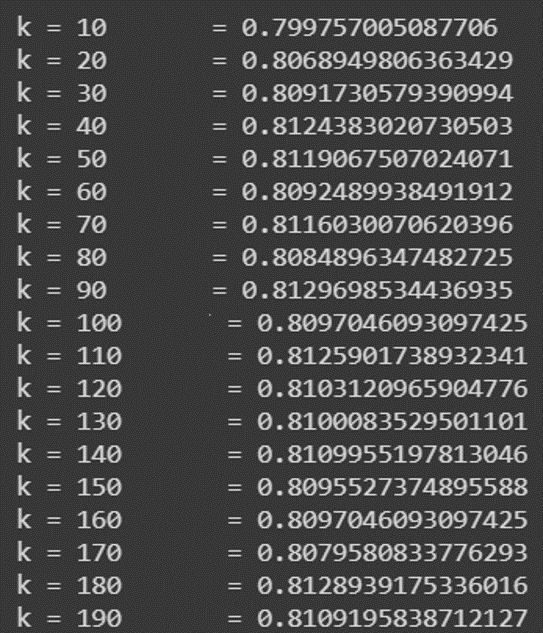

Vamos utilizar o `get_support() `para criar uma mascara e pegar as melhores variáveis  que o `SelectFromModel` selecionou.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=SEED, n_jobs=-1)
selector = SelectFromModel(model_rf, max_features=40, threshold=-np.inf)
selector.fit(x_train, y_train)

x_train2 = selector.transform(x_train)
x_test2 = selector.transform(x_test)

mdl = RandomForestClassifier(n_estimators=100,random_state=SEED, n_jobs=-1)
mdl.fit(x_train2, y_train)  
p = mdl.predict(x_test2)

score = mdl.score(x_test2, y_test)
print("k = {} - Score = {}".format(40, score))


mask = selector.get_support()
print(x_train.columns[mask])

k = 40 - Score = 0.8124383020730503
Index(['g39', 'g50', 'g51', 'g57', 'g58', 'g68', 'g75', 'g100', 'g122', 'g138',
       'g175', 'g178', 'g206', 'g223', 'g230', 'g312', 'g317', 'g322', 'g328',
       'g352', 'g365', 'g367', 'g418', 'g445', 'g463', 'g524', 'g525', 'g529',
       'g600', 'g620', 'g635', 'g656', 'g689', 'g701', 'g738', 'g764', 'c13',
       'c65', 'c73', 'c98'],
      dtype='object')


Esses são os nomes das colunas que o `SelectFromModel ` selecionou para ser as *melhores* `variáveis preditoras` do modelo.

In [ ]:
[['g39', 'g50', 'g51', 'g57', 'g58', 'g68', 'g75', 'g100', 'g122', 'g138',
       'g175', 'g178', 'g206', 'g223', 'g230', 'g312', 'g317', 'g322', 'g328',
       'g352', 'g365', 'g367', 'g418', 'g445', 'g463', 'g524', 'g525', 'g529',
       'g600', 'g620', 'g635', 'g656', 'g689', 'g701', 'g738', 'g764', 'c13',
       'c65', 'c73', 'c98']]

Agora vamos colocar no x as nossas novas variáveis preditoras

In [ ]:
x = dados[['g39', 'g50', 'g51', 'g57', 'g58', 'g68', 'g75', 'g100', 'g122', 'g138',
       'g175', 'g178', 'g206', 'g223', 'g230', 'g312', 'g317', 'g322', 'g328',
       'g352', 'g365', 'g367', 'g418', 'g445', 'g463', 'g524', 'g525', 'g529',
       'g600', 'g620', 'g635', 'g656', 'g689', 'g701', 'g738', 'g764', 'c13',
       'c65', 'c73', 'c98']]

y = dados['atv_moa']

#<font color="#092A32">**Criação de Maquina Preditiva após Balanceamento e Seleção de Variáveis**

Agora que já fizemos o balanceamento, a selecão de variáveis, vamos verificar se o modelo melhorou sua performance?

<img src="https://media0.giphy.com/media/EDt1m8p5hqXG8/giphy.gif?cid=ecf05e47j94osktw8orptmz3cwhhd7ohce977pomhn729nbu&rid=giphy.gif&ct=g" alt="win" width="300"/>



Agora vamos utilizar os mesmos modelos preditivos de Classificação: `Regressão Logistica`, `XGBoost` e `RandomForest`

##Regressão Logistica após Balanceamento e Selecão de Variáveis

In [ ]:
#treinando o modelo
model_rl.fit(x_train, y_train)
y_predict = model_rl.predict(x_test)

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      8776
           1       0.69      0.62      0.65      4393

    accuracy                           0.78     13169
   macro avg       0.76      0.74      0.75     13169
weighted avg       0.78      0.78      0.78     13169



##XGB após Balanceamento e Selecão de Variáveis

In [ ]:
model_x.fit(x_train,y_train)
model_x.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      8776
           1       0.69      0.62      0.65      4393

    accuracy                           0.78     13169
   macro avg       0.76      0.74      0.75     13169
weighted avg       0.78      0.78      0.78     13169



##Random Forest após Balanceamento e Selecão de Variáveis

In [ ]:
mdl.fit(x_train, y_train)
y_predict = mdl.predict(x_test)

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      8776
           1       0.68      0.80      0.73      4393

    accuracy                           0.81     13169
   macro avg       0.78      0.80      0.79     13169
weighted avg       0.82      0.81      0.81     13169



Vamos fazer uma comparação entre os modelos

Modelo |Sem Balanceamento | Com Balanceamento | Com Seleção de Variáveis e Balanceamento |
-------------------|------------------|------------------|------------------
Regressão Logística    | 62% | 78% | 78%
XGBoost    | 65% | 77% | 78%
RandomForest     | 64%| Não utilizado | 81%


O modelo de RandomForest teve uma melhor métrica 81% de score.

Portanto, o RandomForest ganhou o Objetivo 1!
<img src="https://media1.tenor.com/images/0dc98cc3b67969a13cb04e1a110ad6f5/tenor.gif?itemid=17070545" alt="win" width="300"/>


#<font color="#092A32">***Criação da Maquina Preditiva***</font><b>
Objetivo 2: Prever se o experimento foi tratado com Droga ou Com controle.

Agora vamos partir para nosso segundo objetivo! 

Prever se o experimento foi utilizado droga ou controle.

Para isso vamos selecionar nosso` X e Y`

Nosso `y `será a coluna `com_droga` e vamos selecionar todas as variáveis que são inteiro ou float para ser nosso `x`

após isso vamos fazer a divisão da base de dados em teste e treino, deixando 30% para testar.

In [ ]:
X = dados.select_dtypes('float64','int64')
y = dados['com_droga']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)

Vamos utilizar nossos famosos modelos que já foram para o paredão diversas vezes no último objetivo. Quem será que vai ganhar esse objetivo? Pra quem vai a sua torcida?

##Regressão Logistica

In [ ]:
model_rl.fit(X_train, y_train)
y_predict = model_rl.predict(X_test)

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      6539
           1       0.88      0.85      0.86      6630

    accuracy                           0.86     13169
   macro avg       0.87      0.86      0.86     13169
weighted avg       0.87      0.86      0.86     13169



##XGBoost

In [ ]:
#Treinando o modelo XGB
model_x.fit(X_train,y_train)
model_x.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      6539
           1       0.88      0.85      0.86      6630

    accuracy                           0.86     13169
   macro avg       0.87      0.86      0.86     13169
weighted avg       0.87      0.86      0.86     13169



## RandomForest

In [ ]:
#Treinando o modelo
mdl.fit(X_train, y_train)
y_predict = mdl.predict(X_test)

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,y_predict))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6539
           1       1.00      0.98      0.99      6630

    accuracy                           0.99     13169
   macro avg       0.99      0.99      0.99     13169
weighted avg       0.99      0.99      0.99     13169



O resultado é ? 



Modelo |Resultado | 
-------------------|------------------|
Regressão Logística    | 86% 
XGBoost     | 86%
RandomForest     | 99%

RandomForest ganhou novamente!!!!

Desta vez com um alto índice de acerto 99%!

<img src="https://media.tenor.com/images/3a23ac35e3d051f70789f93b49001016/tenor.gif" alt="win" width="300"/>



#<font color="#092A32">***Conclusão***</font>

<img src="https://camo.githubusercontent.com/1c41257b2a5d69c6ff859393ab19fb2061d3e76798128083772ecce35c30978e/68747470733a2f2f7777772e616c7572612e636f6d2e62722f6173736574732f696d672f696d6572736f65732f696d657273616f2d6461646f732f6c6f676f2d6d657273616f2e313631363530313139372e737667" alt="Paredawn" width="200"/>

Essa edição acaba aqui, após todos os `paredawns` e toda a nossa jornada para a criação das maquinas preditivas, espero que tenha se divertido no processo e tenha entendido!

<img src="https://media1.tenor.com/images/70afa534ef1f780fadf92fa3ed56a805/tenor.gif?itemid=20867335" alt="Paredawn" width="300"/>


<p align= "justify">Concluímos os objetivos que tinhamos traçados no começo deste projeto, pois criamos dois modelos que possuem um score de 81% e 99%, um para prever se o MoA vai ativar nos experimentos  e o outro para prever se os experimentos foram utilizados droga ou controle. 

<img src="https://media3.giphy.com/media/zqaGjv9yP1RPFqw770/giphy.gif?cid=ecf05e47jnohivlqowh8s3ro1qsq5wxmot5n4okufa26d8nt&rid=giphy.gif&ct=g" alt="win" width="300"/>

<p align= "justify">Neste projetos aprendemos um pouco mais sobre essa area incrivel de Bioinformativa, a  explorar os conjunto de dados, balancear os dados, selecionar as variáveis, escolher os diversos modelos de classificão para prever a nossa variável target. 

Mas não acaba por aqui! Ainda tem muitas coisas para fazer nesse projeto, como:



*   Balancear as outras colunas;
*   Testar novos modelos de classificação;
*   Tratar mais os dados;
*   Normalizar os dados;
*   Padronizar os dados;
*   Prever outras variáveis;

Obrigado por ter chegado até aqui!





#<font color="#092A32">***FIM***</font>